*Import library's*

In [3]:
#note1: Gabi, e importante manter apenas os modulos que a gente vai usar no código. Parece bobo mas isso salva bastante
# tempo na hora de iniciar a aplicacao. Dei uma refatorada aqui para vc (aproveitei e tirei uns duplicados tb)
import pandas as pd
from textblob import TextBlob as tb
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
import os, re, nltk, string
from bs4 import BeautifulSoup
from collections import OrderedDict
from operator import itemgetter

*Twitter authentication*

In [4]:
#note2: Gabi, apenas para vc expandir o pensamento para um futuro próximo.
# chaves de autenticação abertas no código é uma má prática. 
# para esse trabalho, não se preocupe. Para um futuro - quando vc tiver um tempo - pesquise maneiras de como solucionar
# isso. Vai te ajudar no deploy de aplicações de machine learning na nuvem
consumer_key = 'Jg95VukOglg6RIqRrqt6GYRoa'
consumer_secret = 'ZvH3Oz7jFN0OvDMXGtRriTqOOykGnUgqxAU0wNKWhMElII0ivq'
access_token = '971179238396227584-KkOSGzCwhzv0lokz55Dkp1wTjyurnkW'
access_token_secret = 'y2NNUWU1tlhQYMOps49aSKgckRqTu7T7dPWpyNbMeXvAA'

In [5]:
#note3: Gabi, acredito que foi adicionada muita complexidade nessa função.
# analise essa nova solução e veja se contribui para a melhora geral do seu sistema :)
def get_all_tweets(searchString, maxResult = 200):
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
    new_tweets = api.search(searchString, count = maxResult)
    outtweets = [[tweet.id_str, tweet.created_at, tweet.text.encode("utf-8")] for tweet in new_tweets]
    return outtweets

*Get all tweets*

In [110]:
public_tweets = get_all_tweets('@falanext')
df = pd.DataFrame(public_tweets, columns=['id','created_at','text'])
# Um pequeno truque para mostrar apenas 10 linhas no df
# isso ajuda na visualização do trabalho. Altere o valor abaixo para o que vc achar necessário
pd.set_option("display.max_rows", 30)
df

,id,created_at,text
0,1059963258126385153,2018-11-07 00:18:28,b'@falanext bem que podiam liberar o dep\xc3\x...
1,1059960690901958657,2018-11-07 00:08:16,b'@falanext n\xc3\xa3o consigo cancelar no apl...
2,1059960403109834753,2018-11-07 00:07:07,"b'@falanext oi, eu preciso saber do status de ..."
3,1059954679872937984,2018-11-06 23:44:23,b'@falanext Chamei'
4,1059949785917087744,2018-11-06 23:24:56,b'@falanext Como fa\xc3\xa7o para cancelar a c...
5,1059945013768019968,2018-11-06 23:05:58,"b'thank u, @falanext https://t.co/WHPaSO7VoS'"
6,1059928888598503425,2018-11-06 22:01:54,b'@falanext dm'
7,1059921949848227840,2018-11-06 21:34:19,b'@falanext pode eu quero cancelar minha conta...
8,1059921551074713601,2018-11-06 21:32:44,b'@enafor_ @falanext Bom saber!'
9,1059920264832712705,2018-11-06 21:27:38,"b'@falanext Resolvi agora, 5 hrs depois a aten..."


*Data Cleaning*

In [7]:
#note4: Gabi, acredito que temos alguns caminhos mais fáceis para fazer isso tb.
# analise a solução abaixo e veja se consegue extrair algo bom para o seu trabalho

def cleanTweets(tweetsDF):
    table = str.maketrans(dict.fromkeys(string.punctuation.replace('@','')))
    #essa regex significa:
    # tudo que conter @ OU http OU terminador de linha seguido de uma palavra OU um espaco OU qualquer outro terminador
    # de linha.
    rePattern1 = '(@|http|\\n)(\w+|\s|\S)'
    formattedTweets = []
    for line in tweetsDF['text']:
        formattedStr = line.decode('utf-8').lower()
        formattedStr = formattedStr.translate(table)
        formattedStr = re.sub(rePattern1, "", formattedStr)  
        formattedTweets.append(formattedStr)
    return formattedTweets

formattedTweets = cleanTweets(df)
data = pd.DataFrame(formattedTweets, columns=['text'])
data

,text
0,thank u
1,dm
2,pode eu quero cancelar minha conta urgente eu...
3,bom saber
4,resolvi agora 5 hrs depois a atendente talita...
...,...
95,e ai querida tudo bem kd meus mimos dois ingr...
96,complicado viu
97,esse app é muito bacana mas ainda tô aprenden...
98,ai obg lt3


*Stopwords in portuguese*

In [8]:
#Gabi, aparentemente esse stopwords do nltk e menor do que o que enviei.
# avalie qual se encaixa melhor na sua proposta. Esse do nltk e curto porem eficiente!
stopwords = nltk.corpus.stopwords.words('portuguese')
#caso vc queira saber, desse jeito vc consegue adicionar stopwords novas 
stopwords.append('tô')
stopwords.append('pra')
stopwords.append('é')
stopwords.append('aí')

*WordCloud*

(-0.5, 399.5, 199.5, -0.5)

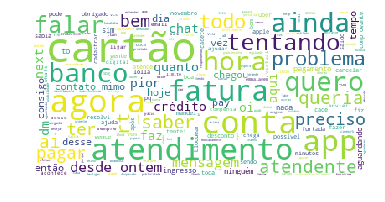

In [9]:
text = " ".join(tweet for tweet in data['text'])
wordcloud = WordCloud(max_font_size = 50, stopwords = stopwords, background_color = 'white').generate(text)
wordcloud.to_file("nouns_user.png")
plt.imshow(wordcloud)
plt.axis("off")

*Basic statistics about the data*

In [10]:
# note: Gabi, implementei o dicionario ordenado que existe na lib collections. Isso vai te ajudar a mostrar apenas as
# palavras mais usadas.
# Removi os stopwords aqui tb
def word_count(str):
    counts = OrderedDict()
    words = str.split()
    for word in words:
        if word not in stopwords:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    return counts

print("There are {} words in the combination of all tweets.".format(len(text)))
# mostrando apenas os 5 primeiros, troque o numero para um que lhe convenha
counts = sorted(word_count(text).items(), key = itemgetter(1), reverse = True)
display(counts[:5])

There are 6677 words in the combination of all tweets.


[('cartão', 18), ('agora', 9), ('atendimento', 8), ('conta', 7), ('app', 7)]

*Transform occurrences in a dataframe*

In [11]:
wordcount = pd.DataFrame(counts, columns=['word', 'counts'])
wordcount[:5]

,word,counts
0,cartão,18
1,agora,9
2,atendimento,8
3,conta,7
4,app,7


*Top 10 most used words*

In [ ]:
# solução implementada acima com orderedDict e no pandas tb

*Top 10 most used words Graphs*

In [ ]:
# não entendi a ideia desse aqui

*ReLi Lexicon - portuguese sentimental analysis*

In [12]:
base_path = '/Users/rpdr/tcc/ReLi-Lex'
allData = []
files = [os.path.join(base_path, f) for f in os.listdir(base_path)]
for file in files:
    t = 'pos' if '_Positivos' in file else 'neg'
    with open(file, 'r', encoding = 'latin-1') as content_file:
        content = content_file.read()
        all = re.findall('\[.*?\]',content)
        for w in all:
            allData.append((w[1:-1], t))
allDataDF = pd.DataFrame(allData, columns=['word', 'sentiment'])
allDataDF

,word,sentiment
0,abandonar,neg
1,aborrecer,neg
2,arrepender,neg
3,assustar,neg
4,aterrorizar,neg
...,...,...
605,talento,pos
606,taquicardia,pos
607,ternura,pos
608,top,pos


In [111]:
#Gabi, talvez essa parte seja a que vc deva focar mais. Sei que vc implementou usando outras bibliotecas, e elas
# funcionam! Só queria te mostrar outras opções, um pouco mais robostas, pensando no seu futuro.
# escolha a que te deixar mais confortável para apresentar o trabalho :)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
X_original = allDataDF['word']
Y_original = allDataDF['sentiment']
# o naive bayes do sklearn precisa que as variaveis independentes sejam contínuas
# por esse motivo precisaremos transformar palavras em números
le_x = LabelEncoder()
X_labelEncoded = le_x.fit_transform(X)
le_y = LabelEncoder()
Y_labelEncoded = le_y.fit_transform(Y)

zippedEncoded = list(zip(X_labelEncoded, Y_labelEncoded))
dfEncoded = pd.DataFrame(zippedEncoded, columns = ['word', 'sentiment'])

#essa linha abaixo é bastante vista nos scripts de data science.
# existem diversas funcoes, de varias libs, que ajudam na hora de fazer a divisao entre treino e teste.
# essa é uma delas de uma lib bem famosa de machine learning - scikitlearn
X_labelEncodedDF = dfEncoded['word']
Y_labelEncodedDF = dfEncoded['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X_labelEncodedDF, Y_labelEncodedDF, test_size=0.30, random_state = 13)

rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train.values.reshape(-1, 1), y_train)
y_pred = rf.predict(X_test.values.reshape(-1, 1))

#quando o assunto é evaluation de modelo, milhares de scores podem ser usados. 
# sugiro que vc de uma olhada no seguinte link:
# http://scikit-learn.org/stable/modules/model_evaluation.html
# escolhi a acurácia mesmo por ser mais simples de entender

print('Accuracy naive bayes on test dataset: {}'.format(round(accuracy_score(y_test, y_pred), 2)))

#precisamos comprar com um modelo que preve tudo como positivo, ou negativo, por exemplo
# chamamos isso de dummy model

dm = DummyClassifier()
dm.fit(X_train.values.reshape(-1, 1), y_train)
y_dummy_pred = dm.predict(X_test.values.reshape(-1, 1))
print('Accuracy dummy model on test dataset: {}'.format(round(accuracy_score(y_test, y_dummy_pred), 2)))

#acabamos de concluir que o modelo de random forest é melhor que um modelo aleatório de classificacao ( o que é ótimo)
# ainda podemos testar alguns parametros para aprimorar o modelo, ou até mesmo fitar outros para ver quem se sai melhor
# mas para esse trabalho acredito que está mais do que suficiente :)

#utilizando RF para prever o sentimento de tudo:
# tweetsDataLabelEncoder = LabelEncoder()
tweetText = data['text']
tweetsEncoded = le_x.fit_transform(tweetText)
y_pred_total = rf.predict(tweetsEncoded.reshape(-1, 1))
y_pred_total_decoded = le_y.inverse_transform(y_pred_total)
data['sentiment'] = y_pred_total_decoded
display(data)

Accuracy naive bayes on test dataset: 0.67
Accuracy dummy model on test dataset: 0.58


,text,sentiment
0,thank u,pos
1,dm,pos
2,pode eu quero cancelar minha conta urgente eu...,pos
3,bom saber,pos
4,resolvi agora 5 hrs depois a atendente talita...,pos
5,quase uma hora para falar com o uma vergonha ...,neg
6,da pra fazer saque sem cartão nas atm do brad...,pos
7,tem disparado o pior atendimento o melhor t...,pos
8,rt next tem conta cartão de crédito grátis e...,neg
9,como faz pra responderem no face 🤔😂,pos


In [112]:
#sua solucao antiga é essa:
cl = NaiveBayesClassifier(allData)

*Tweets classification in positives and negatives*

In [113]:
dados = {}
orderedPrediction = []
for tweet in data.text:
   blob = tb(str(tweet), classifier=cl)
   if blob.sentences:
       for s in blob.sentences:
           orderedPrediction.append(s.classify())
   else:
       orderedPrediction.append('N/A')

Add 'sentiment' column in data frame

In [114]:
data['sentiment'] = orderedPrediction
data

,text,sentiment
0,thank u,pos
1,dm,pos
2,pode eu quero cancelar minha conta urgente eu...,pos
3,bom saber,pos
4,resolvi agora 5 hrs depois a atendente talita...,pos
5,quase uma hora para falar com o uma vergonha ...,neg
6,da pra fazer saque sem cartão nas atm do brad...,neg
7,tem disparado o pior atendimento o melhor t...,neg
8,rt next tem conta cartão de crédito grátis e...,pos
9,como faz pra responderem no face 🤔😂,pos


* Gabi, como vc pode perceber, algumas divergencias são encontradas em ambos modelos. *
* Coisas caracterizadas como positivas parecendo negativas e vice e versa * 
* Por esse motivo frisei bastante sobre divisão de treino e teste bem como evaluation do modelo * 
* Com esses números vc pode argumentar que, no geral, acerta mais do que algo aleatório *
* espero que vc consiga aprender bastante com isso e tire bastante proveito * 
* dúvidas pontuais pode me chamar, estarei disponível * 
* daqui para baixo não olhei com olhos de melhoria, apenas vi o que vc fez * 

*Counting positives and negatives*

In [24]:
display(data.groupby('sentiment').count())

,text
sentiment,
N/A,2
neg,19
pos,79


*Sentimental Analysis Graph based on Naive-Bayes Classification*

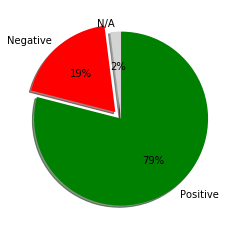

In [23]:
# nice work!!
pie_pos = df.loc['pos']
pie_neg = df.loc['neg']
pie_na = df.loc['N/A']

slices = [pie_na, pie_neg, pie_pos]
tweets = ['N/A', 'Negative', 'Positive']
columns = ['LightGrey', 'Red', 'Green']
 
plt.pie(slices, labels = tweets, colors = columns, startangle = 90, shadow = True, explode = (0, 0.1, 0), autopct='%1.0f%%')

plt.show()

*Positive WordCloud*

*Negative WordCloud*